# Intrusion Detection KDD CUP 99 Data set
## Machine Learning for computer Netwoks
Name: Wilmar QUIROGA

<a href="https://colab.research.google.com/drive/15Bh-vhXqfUJ-lpkHU9yV6PSaNjv_VDrY?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from pandas.plotting import scatter_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive/DataKDD99/

kddcup.data_10_percent	kddcup.names  training_attack_types


In [100]:
with open("gdrive/MyDrive/DataKDD99/kddcup.names", 'r') as d:
    print(d.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
cols ="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins, 
logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,
is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,
srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())
  
columns.append('target')
print(len(columns))
columns

42


['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [ ]:
train_data=pd.read_csv("gdrive/MyDrive/DataKDD99/kddcup.data_10_percent",names=columns)
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
train_data.shape

(494021, 42)

In [ ]:
train_data=train_data.dropna()

In [ ]:
train_data.shape

(494021, 42)

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101050,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
land,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0


In [ ]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [ ]:
train_data['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

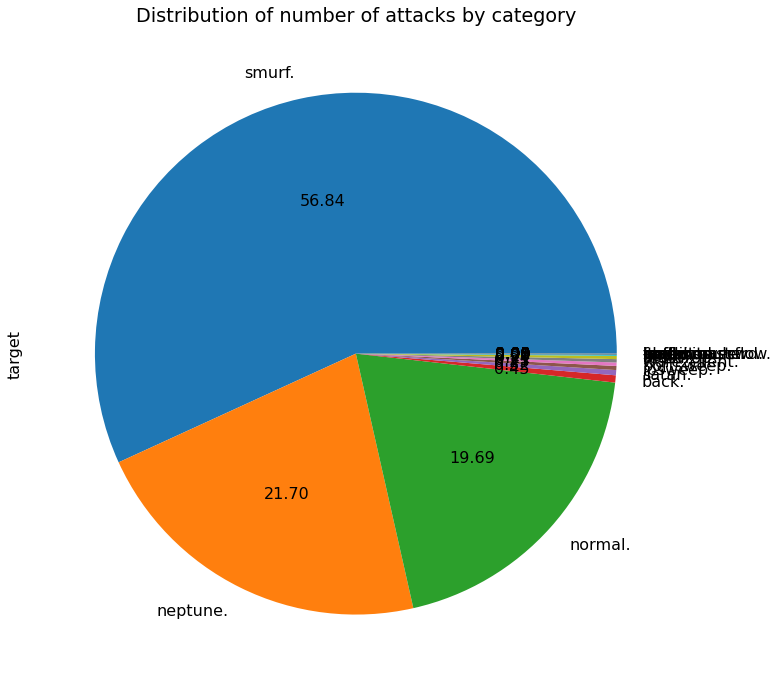

In [ ]:
f = plt.figure()
f.set_figwidth(19)
f.set_figheight(12)
plt.rcParams['font.size'] = 16
train_data['target'].value_counts().plot(kind='pie',autopct='%.2f', title = "Distribution of number of attacks by category")
plt.show()

<AxesSubplot:>

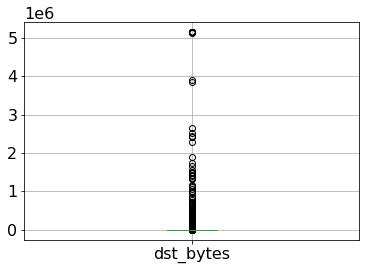

In [ ]:
train_data.boxplot(column=['dst_bytes'])

<AxesSubplot:>

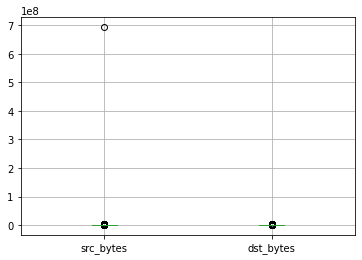

In [ ]:
train_data.boxplot(column=['src_bytes','dst_bytes'])

<AxesSubplot:>

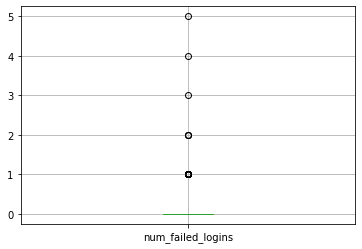

In [ ]:
train_data.boxplot(column=['num_failed_logins'])

array([[<AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'num_failed_logins'}>]], dtype=object)

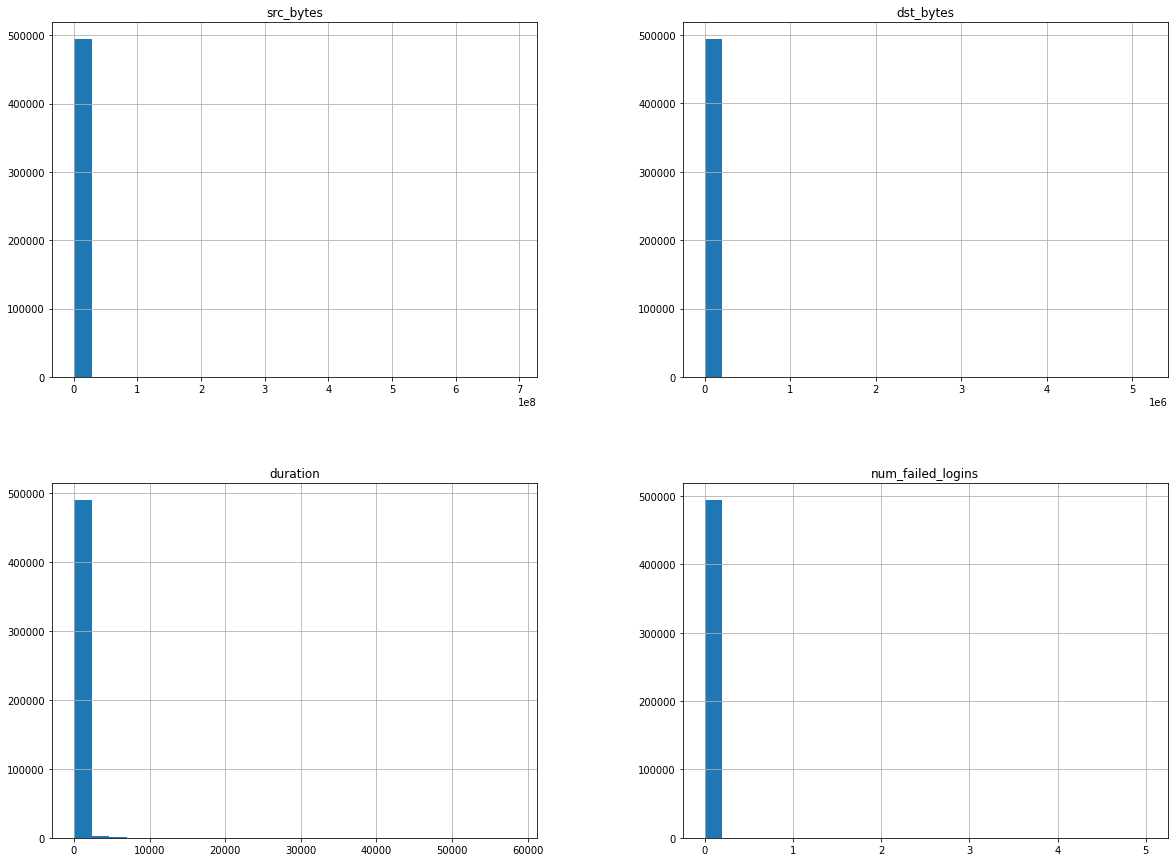

In [ ]:
train_data[['src_bytes','dst_bytes','duration','num_failed_logins']].hist(bins=25, figsize=(20,15))

array([[<AxesSubplot:title={'center':'icmp'}>,
        <AxesSubplot:title={'center':'tcp'}>],
       [<AxesSubplot:title={'center':'udp'}>, <AxesSubplot:>]],
      dtype=object)

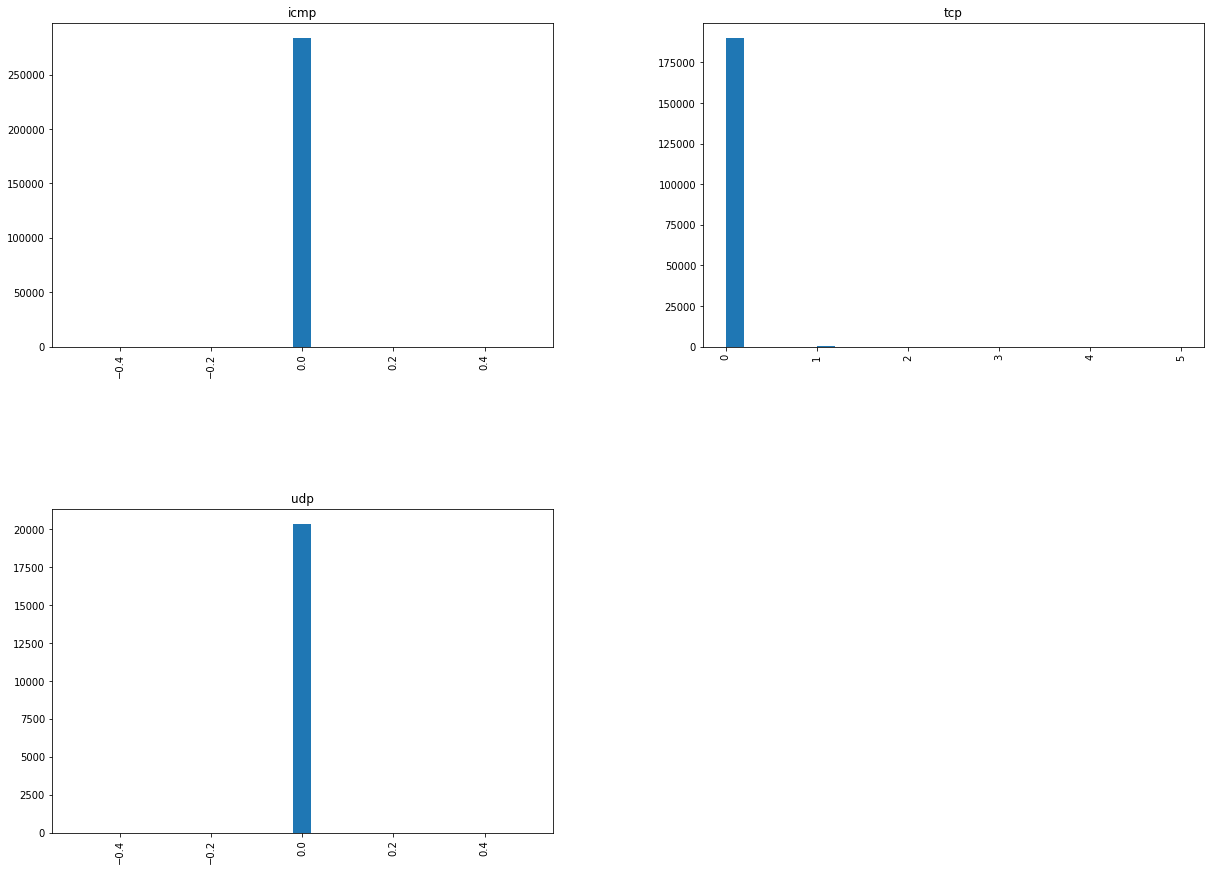

In [ ]:
train_data['num_failed_logins'].hist(by=train_data['protocol_type'],bins=25, figsize=(20,15))

array([[<AxesSubplot:title={'center':'back.'}>,
        <AxesSubplot:title={'center':'buffer_overflow.'}>,
        <AxesSubplot:title={'center':'ftp_write.'}>,
        <AxesSubplot:title={'center':'guess_passwd.'}>,
        <AxesSubplot:title={'center':'imap.'}>],
       [<AxesSubplot:title={'center':'ipsweep.'}>,
        <AxesSubplot:title={'center':'land.'}>,
        <AxesSubplot:title={'center':'loadmodule.'}>,
        <AxesSubplot:title={'center':'multihop.'}>,
        <AxesSubplot:title={'center':'neptune.'}>],
       [<AxesSubplot:title={'center':'nmap.'}>,
        <AxesSubplot:title={'center':'normal.'}>,
        <AxesSubplot:title={'center':'perl.'}>,
        <AxesSubplot:title={'center':'phf.'}>,
        <AxesSubplot:title={'center':'pod.'}>],
       [<AxesSubplot:title={'center':'portsweep.'}>,
        <AxesSubplot:title={'center':'rootkit.'}>,
        <AxesSubplot:title={'center':'satan.'}>,
        <AxesSubplot:title={'center':'smurf.'}>,
        <AxesSubplot:title={'center

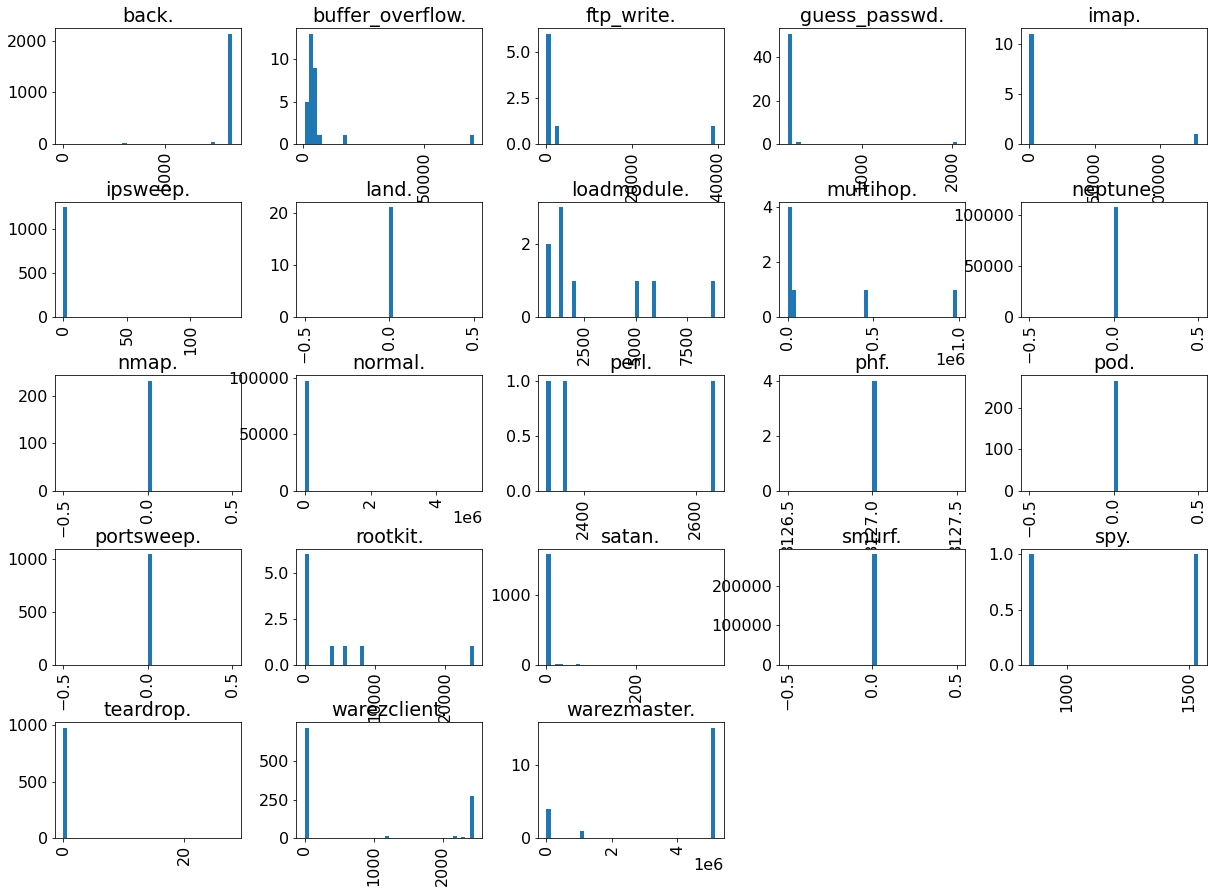

In [ ]:
train_data[['dst_bytes','target']].hist( figsize=(20,15), by='target', bins=40)

array([[<AxesSubplot:title={'center':'Dos'}>,
        <AxesSubplot:title={'center':'Probe'}>],
       [<AxesSubplot:title={'center':'normal.'}>,
        <AxesSubplot:title={'center':'r2l'}>],
       [<AxesSubplot:title={'center':'u2r'}>, <AxesSubplot:>]],
      dtype=object)

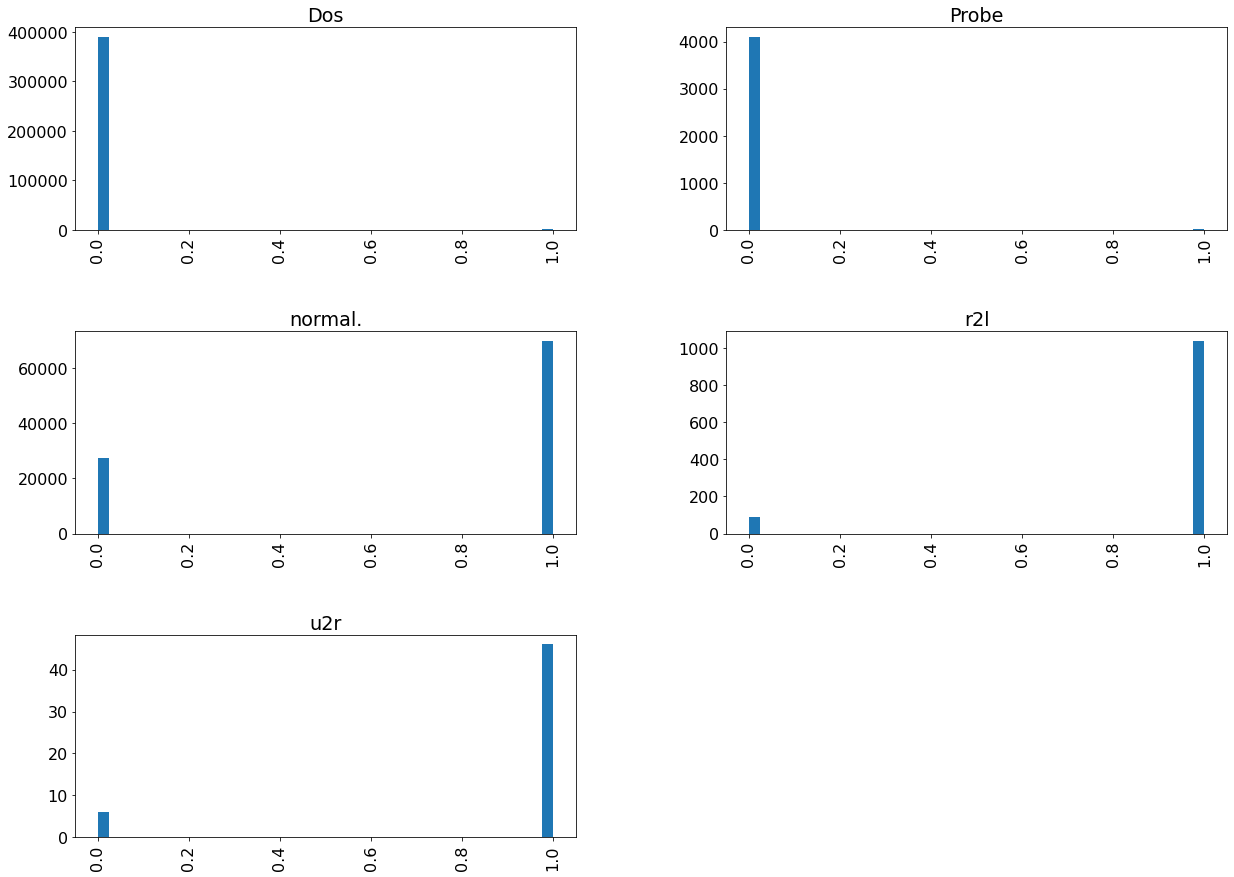

In [ ]:
train_data[['logged_in','target']].hist( figsize=(20,15), by='target', bins=40)

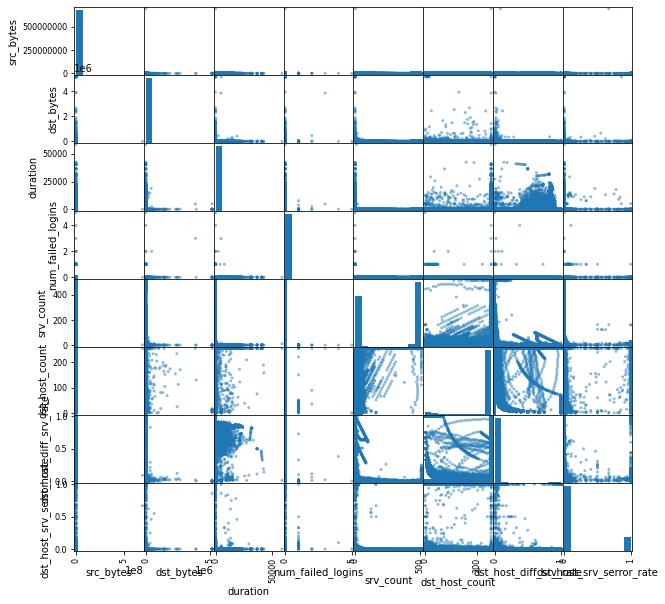

In [ ]:
#Correlations
# Let us just consider some features
columns_to_plot = ['src_bytes','dst_bytes','duration','num_failed_logins','srv_count' ,'dst_host_count', 'dst_host_diff_srv_rate',
                    'dst_host_srv_serror_rate']
sm = scatter_matrix(train_data[columns_to_plot],
                   figsize=(10,10))
plt.show()

In [ ]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization

--2023-02-28 14:02:59--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py.1’

visualization.py.1  100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-02-28 14:02:59 (103 MB/s) - ‘visualization.py.1’ saved [13023/13023]



In [ ]:
#!pip uninstall numpy
#!pip install numpy==1.23.1

Found existing installation: numpy 1.23.1
Uninstalling numpy-1.23.1:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.23.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.23.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)


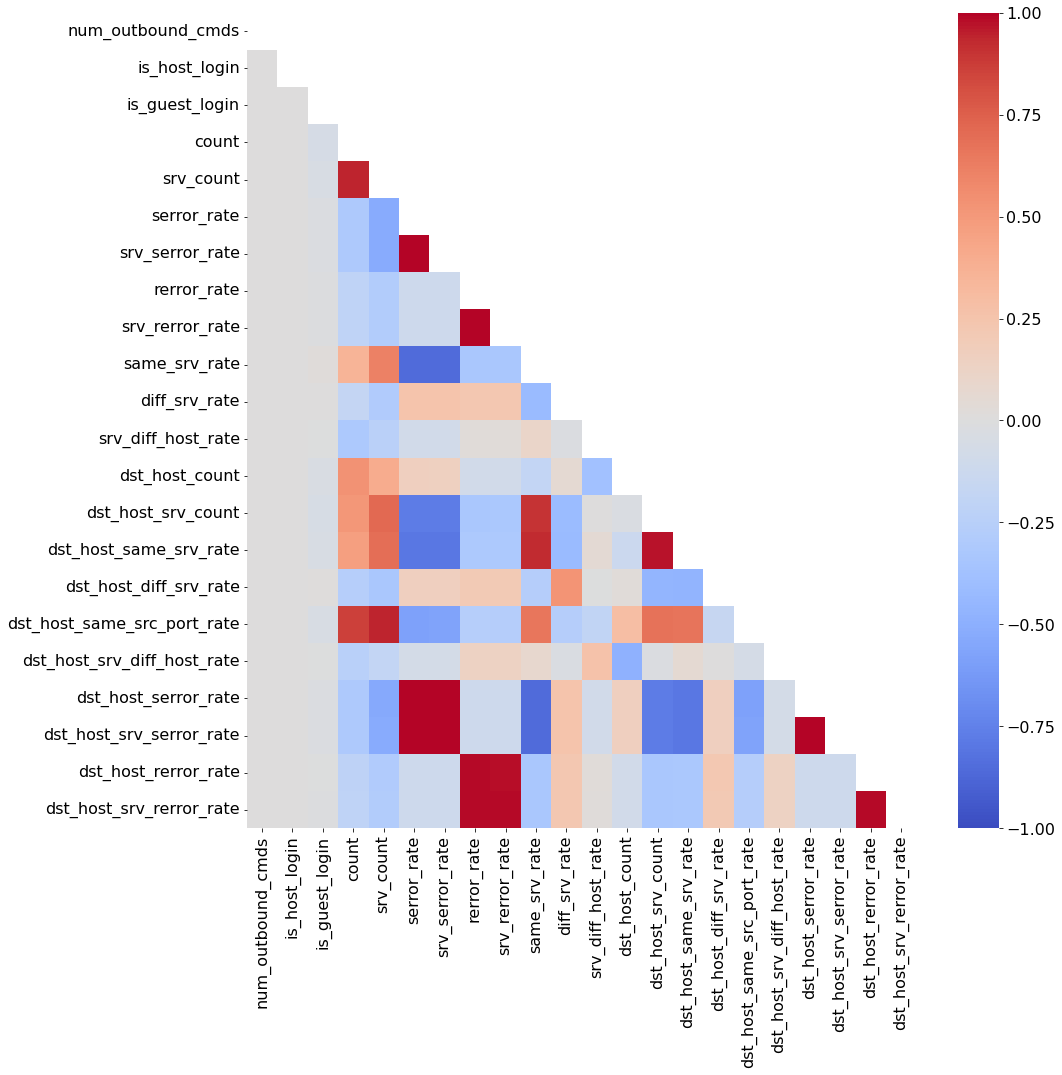

In [ ]:
#train_dataCor=train_data.copy()
#train_dataCor=train_dataCor.drop(train_dataCor.columns[[0, 1, 2, 3, 4, 5 , 6 , 7,  8 , 9, 10 , 11, 12 , 13 , 14, 15 ,16 ,17, 18]], axis='columns')
#visualization.plot_corr(train_dataCor, width=15, height=15, print_value=False)

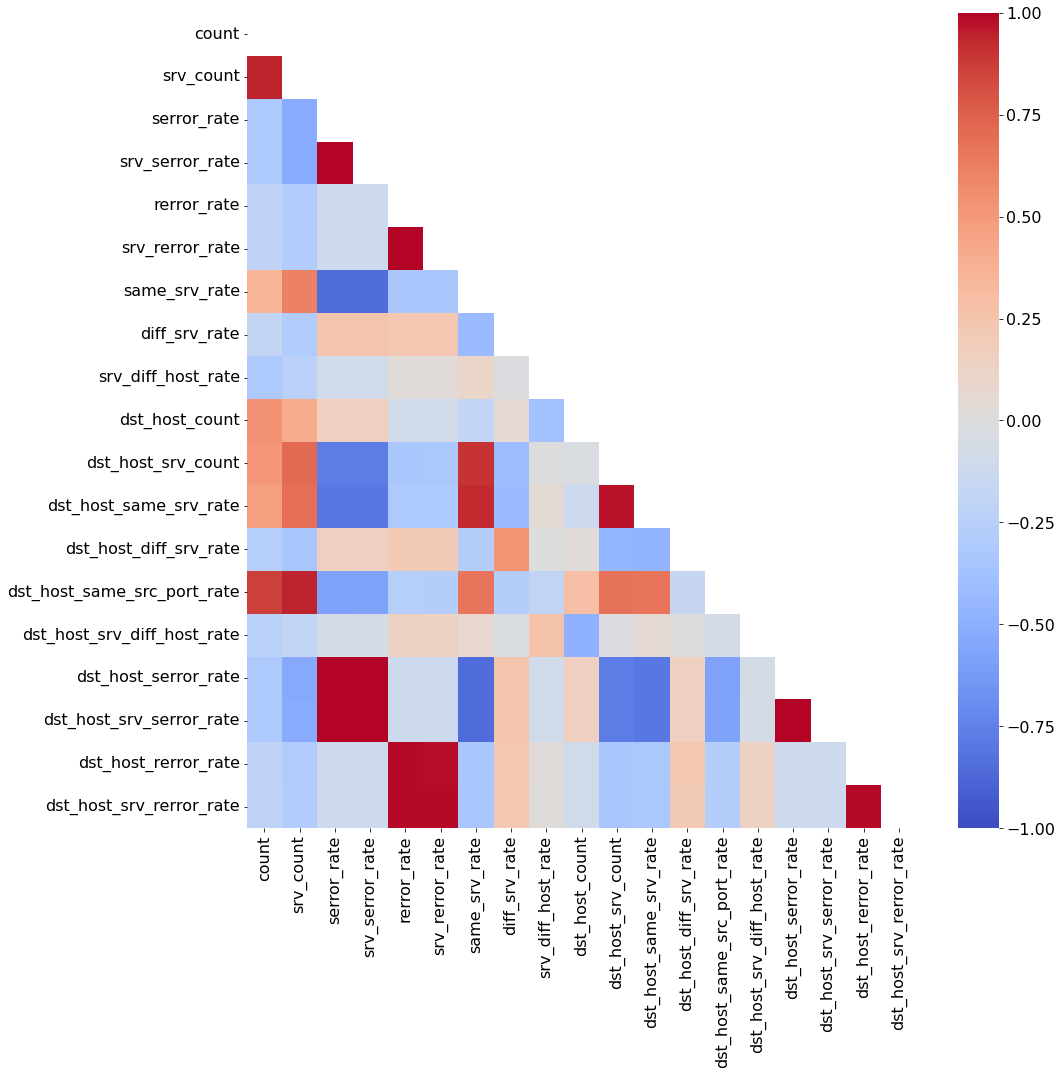

In [ ]:
#train_dataCor=train_dataCor.drop(train_dataCor.columns[[ 12 , 13 , 14, 15]], axis='columns')
#visualization.plot_corr(train_dataCor, width=15, height=15, print_value=False)

In [ ]:
with open("gdrive/MyDrive/DataKDD99/training_attack_types", 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:
train_data.target.replace(['buffer_overflow.','loadmodule.','perl.','rootkit.'],'u2r',inplace=True)
train_data.target.replace(['back.','land.','neptune.','pod.','smurf.','teardrop.'],'Dos',inplace=True)
train_data.target.replace(['guess_passwd.','imap.','ftp_write.','multihop.','phf.','spy.','warezclient.','warezmaster.'],'r2l',inplace=True)      
train_data.target.replace(['ipsweep.','nmap.','portsweep.','satan.'],'Probe',inplace=True)


In [ ]:
train_data.target.value_counts()

Dos        391458
normal.     97278
Probe        4107
r2l          1126
u2r            52
Name: target, dtype: int64

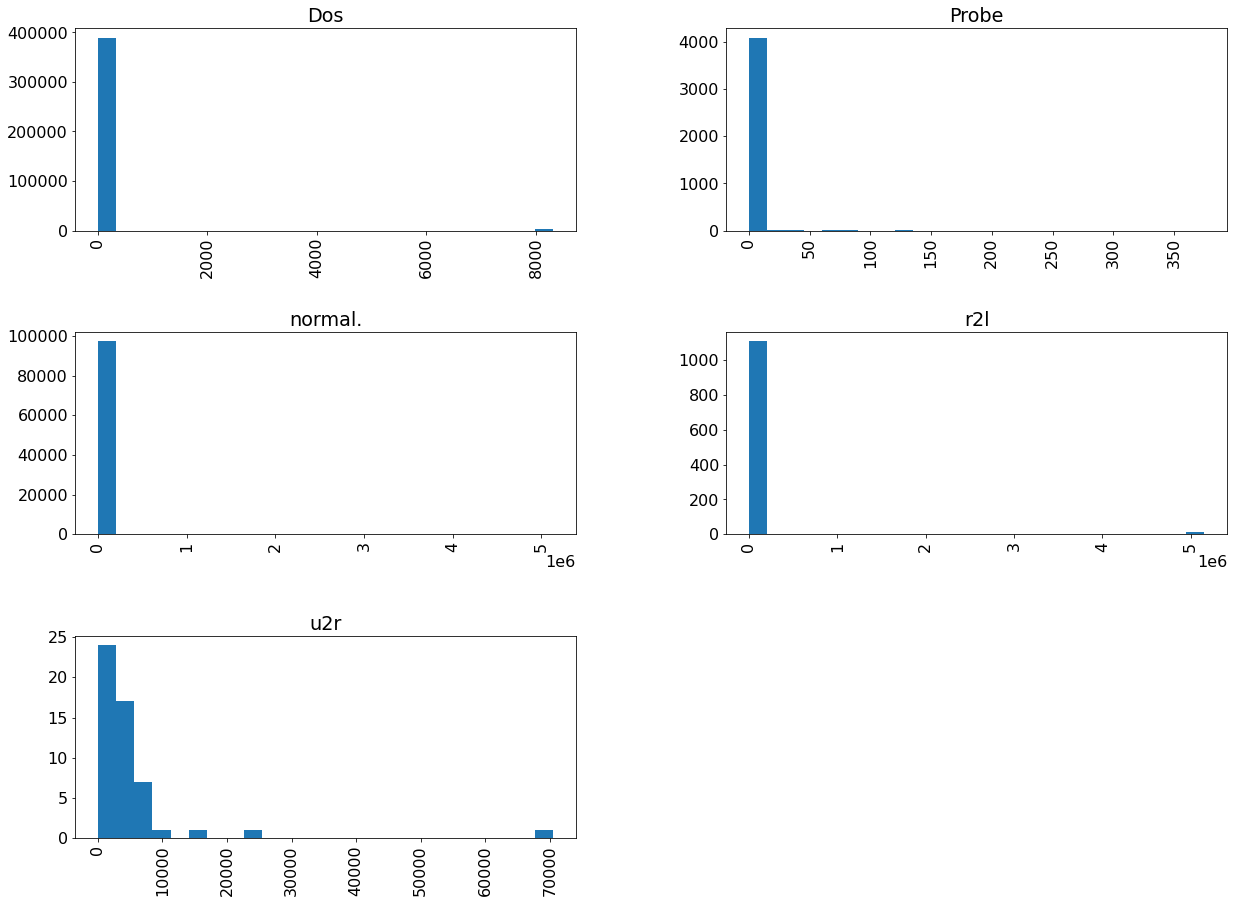

In [ ]:
train_data[['dst_bytes','target']].hist( figsize=(20,15), by='target', bins=25)
train_data4=train_data.copy()

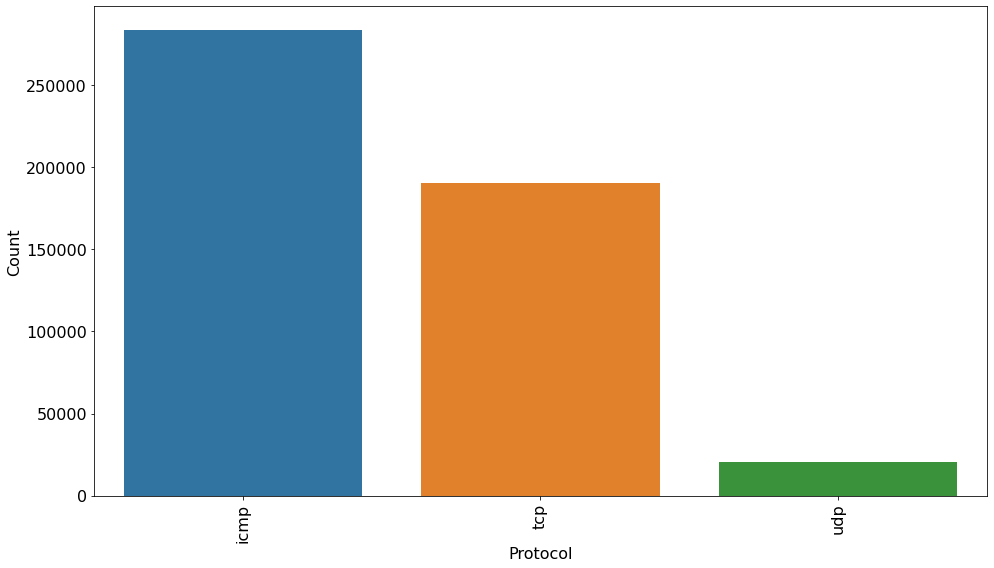

In [ ]:
df2 = pd.DataFrame(columns = ['Protocol'])
df2['Protocol']=[each for each in train_data4.protocol_type.unique()]
df2['Count']=[len(train_data4[train_data4.protocol_type==each]) for each in df2.Protocol]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=df2.Protocol.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

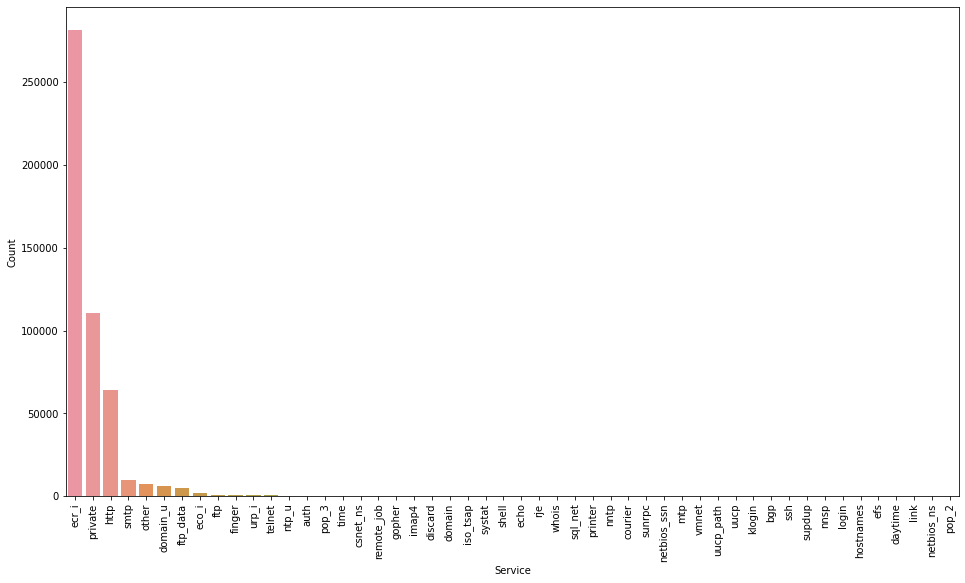

In [ ]:
df2 = pd.DataFrame(columns = ['Service'])
df2['Service']=[each for each in train_data4.service.unique()]
df2['Count']=[len(train_data4[train_data4.service==each]) for each in df2.Service]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=df2.Service.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()

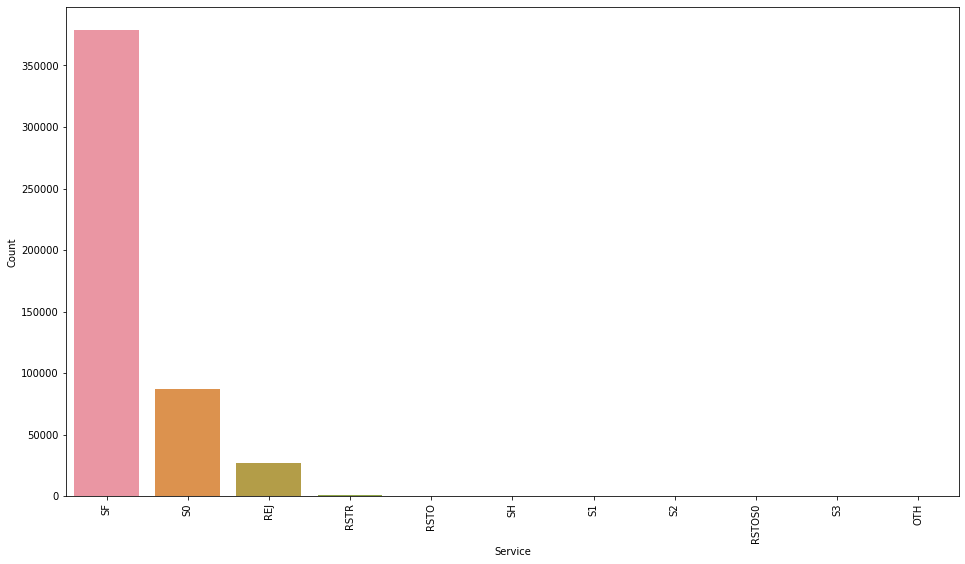

In [ ]:
df2 = pd.DataFrame(columns = ['Flag'])
df2['Flag']=[each for each in train_data4.flag.unique()]
df2['Count']=[len(train_data4[train_data4.flag==each]) for each in df2.Flag]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=df2.Flag.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Flag')
plt.ylabel('Count')
plt.show()

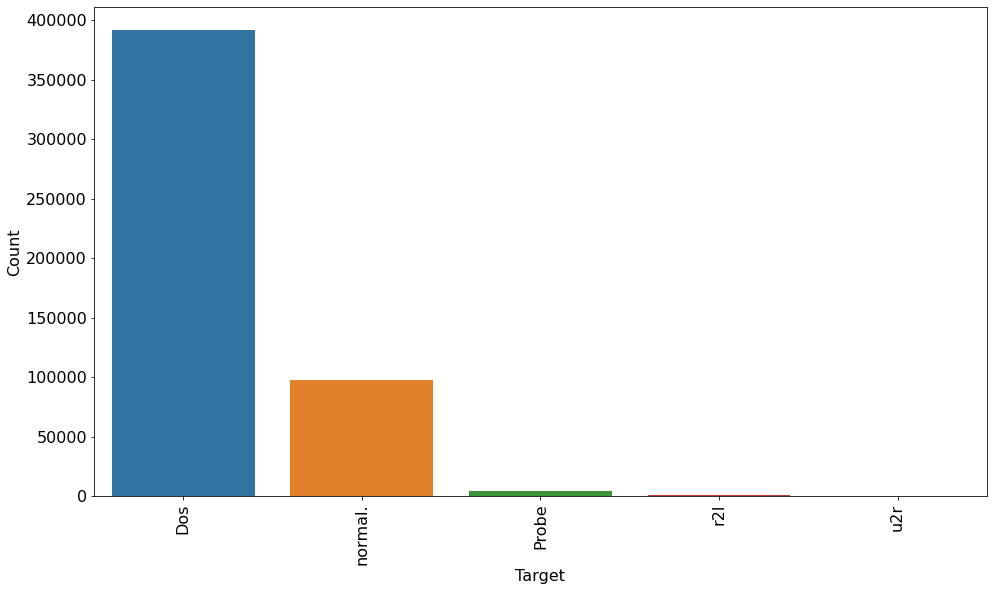

In [ ]:
df2 = pd.DataFrame(columns = ['Target'])
df2['Target']=[each for each in train_data.target.unique()]
df2['Count']=[len(train_data[train_data.target==each]) for each in df2.Target]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=df2.Target.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
train_data4.shape

(494021, 42)

In [ ]:
# Keep columns where there are more than 1 unique values
train_data4 = train_data4[[col for col in train_data4 if train_data4[col].nunique() > 1]] 
#We eliminate num_outbound_cmds and is_host_login

In [ ]:
train_data4.shape

(494021, 40)

In [ ]:
print('The correlation between serror_rate and dst_host_srv_serror_rate is:',train_data4['serror_rate'].corr(train_data4['dst_host_srv_serror_rate']))
print('The correlation between serror_rate and dst_host_serror_rate is:',train_data4['serror_rate'].corr(train_data4['dst_host_serror_rate']))
print('The correlation between srv_count and dst_host_same_src_port_rate is:',train_data4['srv_count'].corr(train_data4['dst_host_same_src_port_rate']))
print('The correlation between count and dst_host_same_src_port_rate is:',train_data4['count'].corr(train_data4['dst_host_same_src_port_rate']))
print('The correlation between rerror_rate and dst_host_srv_rerror_rate is:',train_data4['rerror_rate'].corr(train_data4['dst_host_srv_rerror_rate']))
print('The correlation between rerror_rate and dst_host_rerror_rate is:',train_data4['rerror_rate'].corr(train_data4['dst_host_rerror_rate']))
print('The correlation between srv_rerror_rate and dst_host_srv_rerror_rate is:',train_data4['srv_rerror_rate'].corr(train_data4['dst_host_srv_rerror_rate']))
print('The correlation between srv_rerror_rate and dst_host_rerror_rate is:',train_data4['srv_rerror_rate'].corr(train_data4['dst_host_rerror_rate']))
print('The correlation between same_srv_rate and dst_host_same_srv_rate is:',train_data4['same_srv_rate'].corr(train_data4['dst_host_same_srv_rate']))
print('The correlation between same_srv_rate and dst_host_srv_count is:',train_data4['same_srv_rate'].corr(train_data4['dst_host_srv_count']))
print('The correlation between num_root and num_compromised is:',train_data4['num_root'].corr(train_data4['num_compromised']))
print('The correlation between num_compromised and su_attempted is:',train_data4['num_compromised'].corr(train_data4['su_attempted']))

The correlation between serror_rate and dst_host_srv_serror_rate is: 0.9978492485679861
The correlation between serror_rate and dst_host_serror_rate is: 0.998672968010437
The correlation between srv_count and dst_host_same_src_port_rate is: 0.944926367678324
The correlation between count and dst_host_same_src_port_rate is: 0.8605787404022903
The correlation between rerror_rate and dst_host_srv_rerror_rate is: 0.9851995540751695
The correlation between rerror_rate and dst_host_rerror_rate is: 0.9869947924956178
The correlation between srv_rerror_rate and dst_host_srv_rerror_rate is: 0.9865705438845764
The correlation between srv_rerror_rate and dst_host_rerror_rate is: 0.9821663427308265
The correlation between same_srv_rate and dst_host_same_srv_rate is: 0.927808034269097
The correlation between same_srv_rate and dst_host_srv_count is: 0.8989546630323716
The correlation between num_root and num_compromised is: 0.9938277978737916
The correlation between num_compromised and su_attempted 

In [ ]:
# Remove highly correlated features
train_data4.drop('dst_host_srv_serror_rate',axis = 1,inplace = True)
train_data4.drop('dst_host_serror_rate',axis = 1,inplace = True)
train_data4.drop('dst_host_srv_rerror_rate',axis = 1,inplace = True)
train_data4.drop('dst_host_rerror_rate',axis = 1,inplace = True)
train_data4.drop('dst_host_same_srv_rate',axis = 1,inplace = True)
train_data4.drop('dst_host_srv_count',axis = 1,inplace = True)
train_data4.drop('hot',axis = 1,inplace = True)
train_data4.drop('num_compromised',axis = 1,inplace = True)

In [ ]:
train_data4.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  root_shell                   494021 non-null  int64  
 12  su_attempted                 494021 non-null  int64  
 13 

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import LabelEncoder
#Mapping categorical features 
scale_mapper = {'icmp': 0, 'tcp': 1,'udp': 2}
train_data4['protocol_type'] = train_data4['protocol_type'].replace(scale_mapper)

scale_mapper_flags={'SF': 0, 'S0': 1, 'REJ':2 , 'RSTR': 3, 'SH': 4, 'RSTO':5, 'S1': 6, 'RSTOS0': 7, 'S2': 8, 'S3': 9, 'OTH': 10}
train_data4['flag'] = train_data4['flag'].replace(scale_mapper_flags)
#Label encoder service
le = LabelEncoder()
train_data4['service']=le.fit_transform(train_data4['service'])
train_data4['target'].value_counts()
#Mapping Attacks
scale_mapper_attacks = {'Dos': 0, 'normal.': 1,'Probe': 2, 'r2l': 3, 'u2r': 4}
train_data4['target'] = train_data4['target'].replace(scale_mapper_attacks)
train_data4['target'].value_counts()

0    391458
1     97278
2      4107
3      1126
4        52
Name: target, dtype: int64

# Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Divide between features and labels
print(train_data4.shape)
Labels = train_data4[['target']]
Train_data = train_data4.drop(['target', ], axis = 1)

Train_data_scale = StandardScaler().fit_transform(Train_data)
# Split dataset between training and testing set (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(Train_data_scale, Labels, test_size = 0.25, random_state = 4)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(494021, 32)
(370515, 31) (123506, 31)
(370515, 1) (123506, 1)


In [ ]:
Labels.columns

Index(['target'], dtype='object')

## Neural Networks 

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score,f1_score


model = Sequential()
model.add(Dense(30, input_shape=(31,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
37052/37052 [==============================] - 97s 3ms/step - loss: -9707.2676 - accuracy: 0.9764
Epoch 2/20
37052/37052 [==============================] - 95s 3ms/step - loss: -129380.0078 - accuracy: 0.9762
Epoch 3/20
37052/37052 [==============================] - 95s 3ms/step - loss: -528240.6250 - accuracy: 0.9761
Epoch 4/20
37052/37052 [==============================] - 93s 3ms/step - loss: -1379708.6250 - accuracy: 0.9761
Epoch 5/20
37052/37052 [==============================] - 94s 3ms/step - loss: -2865185.2500 - accuracy: 0.9761
Epoch 6/20
37052/37052 [==============================] - 93s 3ms/step - loss: -5162092.0000 - accuracy: 0.9761
Epoch 7/20
37052/37052 [==============================] - 94s 3ms/step - loss: -8431599.0000 - accuracy: 0.9760
Epoch 8/20
37052/37052 [==============================] - 93s 3ms/step - loss: -12848754.0000 - accuracy: 0.9760
Epoch 9/20
37052/37052 [==============================] - 96s 3ms/step - loss: -18571000.0000 - accuracy: 0.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
train_predictions = model.predict(X_train)
acc_train = accuracy_score(y_train, train_predictions)

test_predictions = model.predict(X_test)
acc_test = accuracy_score(y_test, test_predictions)

print('Train accuracy is: ', acc_train)
print('Test accuracy is: ', acc_test)
print('mme train is:', mean_squared_error(y_train, train_predictions, squared=False))
print('mme test is:', mean_squared_error(y_test, test_predictions, squared=False))

target_names = ['Dos', 'normal.','Probe', 'r2l','u2r']
print(classification_report(y_test, test_predictions, target_names=target_names))

3860/3860 [==============================] - 8s 2ms/step
Train accuracy is:  0.9764193082601245
Test accuracy is:  0.976673198063252
mme train is: 0.1767950631068657
mme test is: 0.17692405990645438
              precision    recall  f1-score   support

         Dos       1.00      0.99      0.99     97736
     normal.       0.91      0.98      0.94     24469
       Probe       0.00      0.00      0.00       996
         r2l       0.00      0.00      0.00       291
         u2r       0.00      0.00      0.00        14

    accuracy                           0.98    123506
   macro avg       0.38      0.39      0.39    123506
weighted avg       0.97      0.98      0.97    123506



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
Dectree = DecisionTreeClassifier(criterion ="entropy", max_depth = 70)

Dectree.fit(X_train, y_train)

train_predictions = Dectree.predict(X_train)
acc_train = accuracy_score(y_train, train_predictions)

test_predictions = Dectree.predict(X_test)
acc_test = accuracy_score(y_test, test_predictions)

print('Train accuracy is: ', acc_train)
print('Test accuracy is: ', acc_test)
print('mme train is:', mean_squared_error(y_train, train_predictions, squared=False))
print('mme test is:', mean_squared_error(y_test, test_predictions, squared=False))

target_names = ['Dos', 'normal.','Probe', 'r2l','u2r']
print(classification_report(y_test, test_predictions, target_names=target_names))

Train accuracy is:  1.0
Test accuracy is:  0.9997166129580749
mme train is: 0.0
mme test is: 0.03390784146702967
              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00     97736
     normal.       1.00      1.00      1.00     24469
       Probe       1.00      0.99      0.99       996
         r2l       0.98      0.97      0.97       291
         u2r       0.67      0.57      0.62        14

    accuracy                           1.00    123506
   macro avg       0.93      0.91      0.92    123506
weighted avg       1.00      1.00      1.00    123506



Normalized confusion matrix
[[9.99989768e-01 0.00000000e+00 1.02316444e-05 0.00000000e+00
  0.00000000e+00]
 [1.22604111e-04 9.99550452e-01 8.17360742e-05 1.63472148e-04
  8.17360742e-05]
 [4.01606426e-03 3.01204819e-03 9.92971888e-01 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 2.74914089e-02 0.00000000e+00 9.65635739e-01
  6.87285223e-03]
 [0.00000000e+00 3.57142857e-01 0.00000000e+00 7.14285714e-02
  5.71428571e-01]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

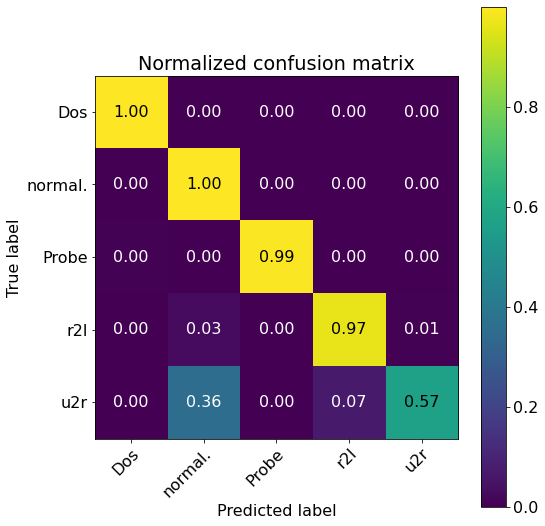

In [ ]:
from visualization import plot_conf_mat, plot_feature_importances
class_names = np.array(['Dos', 'normal.','Probe', 'r2l', 'u2r'])
plot_conf_mat(y_test, test_predictions, class_names)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1200)

lr.fit(X_train, y_train)

train_predictions = lr.predict(X_train)
acc_train = accuracy_score(y_train, train_predictions)

test_predictions = lr.predict(X_test)
acc_test = accuracy_score(y_test, test_predictions)

print('Train accuracy is: ', acc_train)
print('Test accuracy is: ', acc_test)
print('mme train is:', mean_squared_error(y_train, train_predictions, squared=False))
print('mme test is:', mean_squared_error(y_test, test_predictions, squared=False))
print(classification_report(y_test, test_predictions, target_names=target_names))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy is:  0.9928073087459347
Test accuracy is:  0.9919841950998332
mme train is: 0.11118081202239151
mme test is: 0.11971335576610931
              precision    recall  f1-score   support

         Dos       1.00      0.99      1.00     97736
     normal.       0.97      1.00      0.98     24469
       Probe       0.97      0.87      0.92       996
         r2l       0.75      0.43      0.54       291
         u2r       0.71      0.36      0.48        14

    accuracy                           0.99    123506
   macro avg       0.88      0.73      0.78    123506
weighted avg       0.99      0.99      0.99    123506



In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf",gamma=0.1, C=1.0)

svm.fit(X_train, y_train)

train_predictions = svm.predict(X_train)
acc_train = accuracy_score(y_train, train_predictions)

test_predictions = svm.predict(X_test)
acc_test = accuracy_score(y_test, test_predictions)

print('Train accuracy is: ', acc_train)
print('Test accuracy is: ', acc_test)
print('mme train is:', mean_squared_error(y_train, train_predictions, squared=False))
print('mme test is:', mean_squared_error(y_test, test_predictions, squared=False))
print(classification_report(y_test, test_predictions, target_names=target_names))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy is:  0.9931824622484919
Test accuracy is:  0.9926319369099477
mme train is: 0.11412762020257342
mme test is: 0.11889896974216685
              precision    recall  f1-score   support

         Dos       1.00      0.99      1.00     97736
     normal.       0.97      1.00      0.98     24469
       Probe       1.00      0.91      0.95       996
         r2l       0.70      0.34      0.46       291
         u2r       0.50      0.07      0.12        14

    accuracy                           0.99    123506
   macro avg       0.83      0.66      0.70    123506
weighted avg       0.99      0.99      0.99    123506



Normalized confusion matrix
[[9.99969305e-01 3.06949333e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.63472148e-04 9.98773959e-01 5.72152520e-04 2.86076260e-04
  2.04340186e-04]
 [0.00000000e+00 9.03614458e-03 9.90963855e-01 0.00000000e+00
  0.00000000e+00]
 [6.87285223e-03 1.37457045e-02 0.00000000e+00 9.72508591e-01
  6.87285223e-03]
 [0.00000000e+00 2.14285714e-01 0.00000000e+00 0.00000000e+00
  7.85714286e-01]]


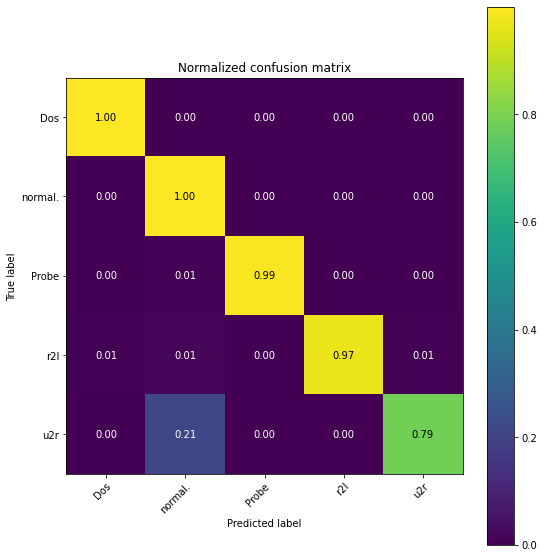

In [ ]:
from visualization import plot_conf_mat, plot_feature_importances
class_names = np.array(['Dos', 'normal.','Probe', 'r2l', 'u2r'])
plot_conf_mat(y_test, test_predictions, class_names)

In [ ]:
balanced_train_dataset = train_data4.groupby('target')
balanced_train_dataset = balanced_train_dataset.apply(lambda x: x.sample(balanced_train_dataset.size().min()).reset_index(drop=True))
balanced_train_dataset['target'].value_counts()
train_data4['target'].value_counts()

0    391458
1     97278
2      4107
3      1126
4        52
Name: target, dtype: int64

## Feature importance

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


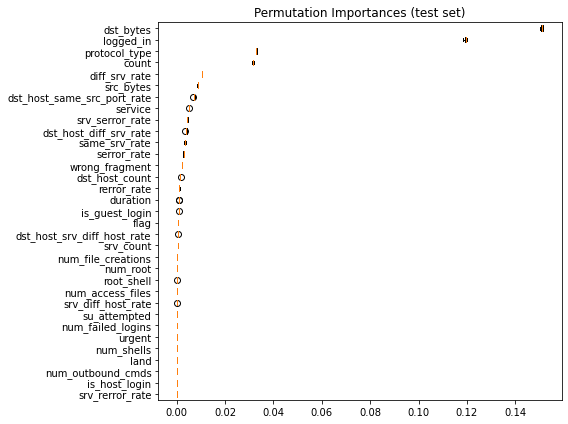

In [ ]:
from sklearn.inspection import permutation_importance
X_test= pd.DataFrame(X_test, columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins',
       'logged_in', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'])

y_test=pd.DataFrame(y_test, columns=['target'])
def boxplot_pi(model, X_test, y_test):
  result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                  random_state=42, n_jobs=-1)
  sorted_idx = result.importances_mean.argsort()

  fig, ax = plt.subplots(figsize=(8,6))
  ax.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=X_test.columns[sorted_idx])
  ax.set_title("Permutation Importances (test set)")
  fig.tight_layout()
  plt.show()

boxplot_pi(Dectree, X_test, y_test)


In [ ]:
train_data_SB=train_data4.copy() 
train_data_SB['target'].value_counts()

for index, row in train_data_SB.iterrows():
    if (train_data_SB['target']==0):
        train_data_SB.drop(index)


0    391458
1     97278
2      4107
3      1126
4        52
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Dectree, Train_data, Labels, cv=8)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.99719852 0.99889884 0.99965994 0.99928748 0.99920652 0.99729563
 0.99965993 0.66754113]
0.96 accuracy with a standard deviation of 0.11


In [ ]:
balanced_train_dataset = train_data4.groupby('target')
balanced_train_dataset = balanced_train_dataset.apply(lambda x: x.sample(balanced_train_dataset.size().min()).reset_index(drop=True))
balanced_train_dataset['target'].value_counts()

0    52
1    52
2    52
3    52
4    52
Name: target, dtype: int64

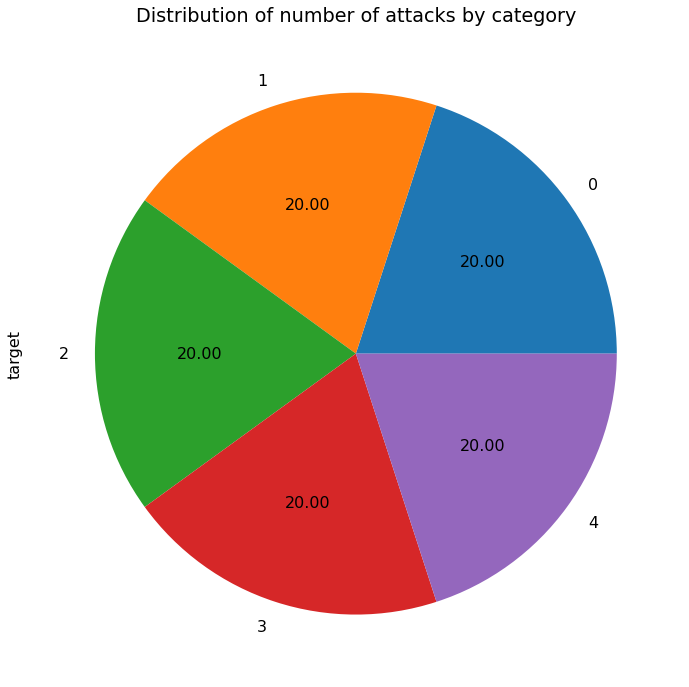

In [ ]:
f = plt.figure()
f.set_figwidth(19)
f.set_figheight(12)
balanced_train_dataset['target'].value_counts().plot(kind='pie',autopct='%.2f', title = "Distribution of number of attacks by category")
plt.show()

In [ ]:
# Divide between features and labels
print(balanced_train_dataset.shape)
Labels = balanced_train_dataset[['target']]
Train_data = balanced_train_dataset.drop(['target', ], axis = 1)

Train_data_scale = StandardScaler().fit_transform(Train_data)
# Split dataset between training and testing set (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(Train_data_scale, Labels, test_size = 0.25, random_state = 4)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(260, 40)
(195, 39) (65, 39)
(195, 1) (65, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
Dectree = DecisionTreeClassifier(criterion ="entropy", max_depth = 70)

Dectree.fit(X_train, y_train)

train_predictions = Dectree.predict(X_train)
acc_train = accuracy_score(y_train, train_predictions)

test_predictions = Dectree.predict(X_test)
acc_test = accuracy_score(y_test, test_predictions)

print('Train accuracy is: ', acc_train)
print('Test accuracy is: ', acc_test)
print('mme train is:', mean_squared_error(y_train, train_predictions, squared=False))
print('mme test is:', mean_squared_error(y_test, test_predictions, squared=False))

target_names = ['Dos', 'normal.','Probe', 'r2l','u2r']
print(classification_report(y_test, test_predictions, target_names=target_names))

Train accuracy is:  1.0
Test accuracy is:  0.9230769230769231
mme train is: 0.0
mme test is: 0.41137667560372115
              precision    recall  f1-score   support

         Dos       0.93      0.93      0.93        15
     normal.       0.91      0.91      0.91        11
       Probe       1.00      0.92      0.96        12
         r2l       0.80      0.89      0.84         9
         u2r       0.94      0.94      0.94        18

    accuracy                           0.92        65
   macro avg       0.92      0.92      0.92        65
weighted avg       0.93      0.92      0.92        65



Normalized confusion matrix
[[0.93333333 0.06666667 0.         0.         0.        ]
 [0.         0.90909091 0.         0.09090909 0.        ]
 [0.08333333 0.         0.91666667 0.         0.        ]
 [0.         0.         0.         0.88888889 0.11111111]
 [0.         0.         0.         0.05555556 0.94444444]]


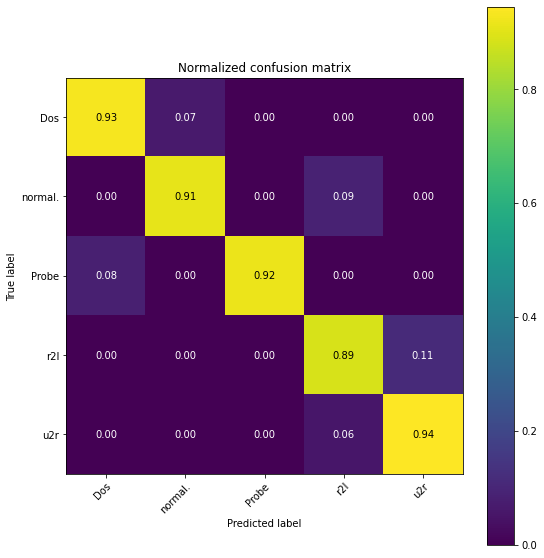

In [ ]:
from visualization import plot_conf_mat, plot_feature_importances
class_names = np.array(['Dos', 'normal.','Probe', 'r2l', 'u2r'])
plot_conf_mat(y_test, test_predictions, class_names)